# **Telco Customer Churn**

### Created by : Nabila Setya Utami

## **Latar Belakang**
Perusahaan telekomunikasi (telco) menghadapi tantangan besar akibat tingginya tingkat pelanggan yang berhenti berlangganan (*churn*). Pelanggan sering berpindah ke penyedia lain karena tawaran lebih menarik atau layanan yang lebih baik. Masalah ini berdampak langsung pada pendapatan perusahaan, di mana biaya mendapatkan pelanggan baru jauh lebih tinggi dibandingkan mempertahankan pelanggan lama. Selain itu, kegagalan menarik pelanggan baru memperburuk dampak dari tingginya angka *churn*.

Tantangan ini membuat perusahaan harus memahami penyebab *churn* dan mengembangkan strategi yang dapat mempertahankan pelanggan. Strategi retensi pelanggan (*customer retention*) menjadi solusi penting karena lebih hemat biaya dan dapat mengurangi risiko kehilangan pendapatan.

## **Mengapa *Churn* Menjadi Masalah?**
1. **Penurunan Pendapatan:** Semakin tinggi angka *churn*, semakin besar penurunan pendapatan perusahaan.
2. **Biaya Pelanggan Baru:** Biaya menarik pelanggan baru jauh lebih mahal dibandingkan mempertahankan pelanggan yang ada.
3. **Kekurangan Pelanggan Baru:** Ketidakmampuan menarik pelanggan baru dapat memperburuk dampak negatif dari *churn*.

## **Tujuan**
1. Memahami karakteristik pelanggan yang berisiko berhenti berlangganan.
2. Mengidentifikasi faktor penyebab *churn* untuk merancang strategi retensi yang efektif.
3. Menggunakan anggaran retensi secara tepat untuk mengurangi potensi kehilangan pelanggan.

## **Strategi *Customer Retention* / Retensi Pelanggan**
Perusahaan secara rutin mengalokasikan anggaran bulanan untuk *customer retention*. Pendekatan ini melibatkan:
- Analisis data pelanggan untuk memprediksi kemungkinan *churn*.
- Penerapan model pembelajaran mesin (*machine learning*) untuk mengidentifikasi pelanggan berisiko tinggi.
- Implementasi langkah-langkah yang meningkatkan pengalaman pelanggan dan loyalitas.

## **Risiko Tanpa Strategi yang Tepat**
- Peningkatan jumlah pelanggan yang berhenti berlangganan.
- Penurunan signifikan pada pendapatan perusahaan.

## **Pendekatan Analitik**
Pendekatan analitik yang diusulkan adalah pengembangan model pembelajaran mesin (*machine learning*) untuk memprediksi kemungkinan *churn* pelanggan berdasarkan pola dan riwayat mereka. Model ini akan membantu perusahaan mengidentifikasi pelanggan yang berisiko tinggi sehingga dapat mengambil langkah pencegahan yang efektif.

## **Evaluasi Model dengan Metric `Recall`**

Evaluasi model selanjutnya akan menggunakan `Recall` sebagai metric utama. Pemilihan `Recall` dilakukan karena dalam konteks **Telco Churn**, kesalahan **`FALSE NEGATIVE`** dianggap lebih kritikal.

**Alasan Memilih Recall**
1. **False Negative (FN)**  
   Pelanggan yang diprediksi **tidak akan churn** padahal sebenarnya **akan churn** menjadi kasus yang sangat berisiko.  
   - Pelanggan ini **tidak akan diberikan perlakuan khusus**, sehingga mereka memiliki kemungkinan besar untuk benar-benar churn.  
   - Hal ini dapat berdampak fatal terhadap bisnis.

2. **False Positive (FP)**  
   Pelanggan yang diprediksi **akan churn** padahal sebenarnya **tidak akan churn** tidak menimbulkan risiko besar.  
   - Mereka tetap akan **mendapatkan perlakuan khusus**, tetapi perlakuan tersebut **tidak akan merugikan pelanggan** atau bisnis secara signifikan.



## **Dataset Attribut**

| **Atribut**            | **Deskripsi**                                                              |
|-------------------------|---------------------------------------------------------------------------|
| **Dependents**          | Apakah pelanggan memiliki tanggungan atau tidak.                         |
| **Tenure**              | Jumlah bulan pelanggan telah berlangganan dengan perusahaan.             |
| **OnlineSecurity**      | Apakah pelanggan memiliki layanan keamanan online atau tidak.            |
| **OnlineBackup**        | Apakah pelanggan memiliki layanan cadangan online atau tidak.            |
| **InternetService**     | Apakah pelanggan berlangganan layanan internet atau tidak.               |
| **DeviceProtection**    | Apakah pelanggan memiliki perlindungan perangkat atau tidak.             |
| **TechSupport**         | Apakah pelanggan memiliki layanan dukungan teknis atau tidak.            |
| **Contract**            | Jenis kontrak berdasarkan durasi.                                        |
| **PaperlessBilling**    | Tagihan yang diterbitkan dalam bentuk non-kertas (digital).              |
| **MonthlyCharges**      | Jumlah biaya layanan yang dikenakan setiap bulan.                        |
| **Churn**               | Apakah pelanggan berhenti berlangganan atau tidak.                      |



## **Import Library**

In [1]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

## **Load Dataset**

In [2]:
df = pd.read_csv("data_telco_customer_churn.csv")
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [3]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [4]:
data = df.copy()
data

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


## **Data Cleaning**

In [5]:
# Extract General Information (Nama Kolom, Tipe Data, Missing Value, % Missing Value, Unique, Sample Unique)

list_item = []
for i in data.columns :
    list_item.append([
        i,
        data[i].dtype,
        data[i].isna().sum(),
        round(data[i].isna().sum()/len(data), 2),
        data[i].nunique(),
        data[i].unique()[:3]
    ])

info_df = pd.DataFrame(list_item,
                       columns='Nama Kolom, Tipe Data, Missing Value, % Missing Value, N Unique, Unique Sample'.split(', '))
info_df

,Nama Kolom,Tipe Data,Missing Value,% Missing Value,N Unique,Unique Sample
0,Dependents,object,0,0.0,2,"[Yes, No]"
1,tenure,int64,0,0.0,73,"[9, 14, 64]"
2,OnlineSecurity,object,0,0.0,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,0,0.0,3,"[No, Yes, No internet service]"
4,InternetService,object,0,0.0,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,0,0.0,3,"[Yes, No internet service, No]"
6,TechSupport,object,0,0.0,3,"[Yes, No, No internet service]"
7,Contract,object,0,0.0,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0,0.0,1422,"[72.9, 82.65, 47.85]"


**Cek Duplikasi**

In [6]:
data.duplicated().sum()

np.int64(77)

Setelah dilakukan pengecekan, ditemukan bahwa terdapat `77 baris data duplikasi` dalam dataset. </br>
Karena adanya duplikasi data, langkah selanjutnya adalah menghapus data duplikasi tersebut untuk memastikan dataset menjadi bersih dan tidak ada data yang berulang.

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

np.int64(0)

**Data Anomaly**

1. Analisis Data Janggal pada Variabel `Tenure`

    Berdasarkan hasil di atas, ditemukan data yang tidak sesuai pada variabel `Tenure`.  
    `Tenure` merepresentasikan durasi pelanggan menggunakan produk atau layanan perusahaan. Karena layanan bersifat *subscription*, tidak memungkinkan adanya nilai **0 bulan** karena minimal durasi penggunaan layanan adalah **1 (satu) bulan**.  

Berikut adalah sampel data dengan nilai `Tenure` = 0 untuk ditinjau lebih lanjut:


In [9]:
data[data['tenure'] == 0]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
82,Yes,0,No,Yes,DSL,Yes,Yes,Two year,No,73.35,No
325,Yes,0,Yes,No,DSL,Yes,Yes,Two year,Yes,52.55,No
1053,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,25.35,No
2017,Yes,0,Yes,Yes,DSL,Yes,No,Two year,No,80.85,No
2902,Yes,0,Yes,Yes,DSL,No,Yes,Two year,Yes,61.90,No
3410,Yes,0,Yes,Yes,DSL,Yes,Yes,Two year,No,56.05,No
4192,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.25,No
4441,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,19.85,No


In [10]:
print('\nTerdapat', data[data['tenure'] == 0].value_counts().sum(), 'data pelanggan yang memiliki durasi langganan 0 bulan. \n')


Terdapat 8 data pelanggan yang memiliki durasi langganan 0 bulan. 



In [11]:
data[data['Contract'] == 'Two year']['tenure'].unique()

array([64, 72, 58, 71, 69, 55, 66, 70,  0, 67, 62, 51, 56, 52, 60, 63, 59,
       49, 35, 57, 65, 27, 54, 11, 46, 48, 40, 39, 31, 45, 22, 68, 43, 53,
        8, 14, 24, 30,  6, 47, 41, 61,  4, 19, 26, 33, 16, 44, 23, 18, 17,
       36, 34, 25, 12, 50, 20, 37, 42, 21, 13, 32,  9, 29,  3, 10,  7, 38,
       15,  1])

Setelah ditinjau lebih lanjut, ditemukan bahwa terdapat pelanggan dengan nilai `Tenure` = 0. Berdasarkan observasi, pelanggan dengan kontrak Two Year memiliki durasi penggunaan layanan yang cukup beragam, mulai dari 1 bulan hingga 72 bulan. Secara definisi, kontrak **Two Year** memiliki durasi 24 bulan. Namun, kolom `Tenure` mencerminkan berapa lama pelanggan telah menggunakan layanan, bukan durasi kontrak yang mereka pilih.

Nilai `Tenure` = 0 menunjukkan bahwa pelanggan baru saja memulai penggunaan layanan dan belum mencapai satu bulan penuh. Hal ini tetap logis meskipun pelanggan tersebut telah memilih kontrak **Two Year** sejak awal, karena layanan mereka baru aktif dalam periode yang sangat singkat.

Berdasarkan fakta ini, data dengan `Tenure` = 0 tetap akan digunakan dalam analisis, karena data ini merepresentasikan pelanggan baru yang valid dan relevan untuk dianalisis.


2. Mengubah Kolom yg Memiliki Nilai Setara : `No internet service` Menjadi `No`

    Terdapat empat kolom dengan nilai `No internet service`, yaitu:
        1. OnlineSecurity
        2. OnlineBackup
        3. DeviceProtection
        4. TechSupport

    Nilai `No internet service` pada keempat kolom ini dianggap setara dengan `No`. Oleh karena itu, data pada keempat kolom tersebut akan diubah dari No `internet service` menjadi `No` agar lebih konsisten dan mudah diproses.

In [12]:
check = data[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']]
for i in check:
    print('Kolom', [i], 'dengan unique data :', data[i].unique())

Kolom ['OnlineSecurity'] dengan unique data : ['No' 'Yes' 'No internet service']
Kolom ['OnlineBackup'] dengan unique data : ['No' 'Yes' 'No internet service']
Kolom ['DeviceProtection'] dengan unique data : ['Yes' 'No internet service' 'No']
Kolom ['TechSupport'] dengan unique data : ['Yes' 'No' 'No internet service']


In [13]:
for i in check:
    data[i].replace('No internet service', 'No', inplace=True)

In [14]:
for column in check:
    unique_values = data[column].unique()
    print(f"Unik data pada kolom {column}: {unique_values}")

Unik data pada kolom OnlineSecurity: ['No' 'Yes']
Unik data pada kolom OnlineBackup: ['No' 'Yes']
Unik data pada kolom DeviceProtection: ['Yes' 'No']
Unik data pada kolom TechSupport: ['Yes' 'No']


In [15]:
data.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No,No,No,No,No,Month-to-month,Yes,23.60,No


Hasil setelah dilakukan proses cleaning data dan siap digunakan untuk proses selanjutnya

In [16]:
list_item = []
for i in data.columns :
    list_item.append([
        i,
        data[i].dtype,
        data[i].isna().sum(),
        round(data[i].isna().sum()/len(data), 2),
        data[i].nunique(),
        data[i].unique()[:3]
    ])

after_cleaned = pd.DataFrame(list_item,
                       columns='Nama Kolom, Tipe Data, Missing Value, % Missing Value, N Unique, Unique Sample'.split(', '))
after_cleaned

,Nama Kolom,Tipe Data,Missing Value,% Missing Value,N Unique,Unique Sample
0,Dependents,object,0,0.0,2,"[Yes, No]"
1,tenure,int64,0,0.0,73,"[9, 14, 64]"
2,OnlineSecurity,object,0,0.0,2,"[No, Yes]"
3,OnlineBackup,object,0,0.0,2,"[No, Yes]"
4,InternetService,object,0,0.0,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,0,0.0,2,"[Yes, No]"
6,TechSupport,object,0,0.0,2,"[Yes, No]"
7,Contract,object,0,0.0,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0,0.0,1422,"[72.9, 82.65, 47.85]"


## **EDA (Exploratory Data Analysis)**

In [17]:
data['Churn'].value_counts()

Churn
No     3565
Yes    1288
Name: count, dtype: int64

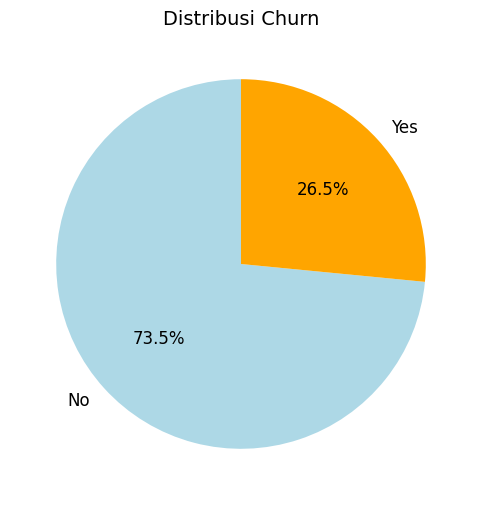

In [18]:
churn_counts = data['Churn'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, 
        labels=churn_counts.index, 
        autopct='%.1f%%', 
        colors=['lightblue', 'orange'],  
        startangle=90, 
        textprops={'fontsize': 12})

# Menambahkan judul
plt.title('Distribusi Churn', fontsize=14)

# Menampilkan pie chart
plt.show()

- **Yes**: Pelanggan berhenti menggunakan produk atau layanan.
- **No**: Pelanggan tetap menggunakan produk atau layanan.

Dari pie chart yang ditampilkan, terlihat bahwa terdapat ketidakseimbangan (*imbalance*) antara data Churn dan Non-Churn. Jumlah data pelanggan yang *Non-Churn* hampir tiga kali lebih besar dibandingkan dengan data pelanggan yang *Churn*. Ketidakseimbangan ini perlu diperhatikan, terutama jika data akan digunakan untuk membangun model prediktif, karena dapat memengaruhi performa model dalam mengenali pola churn.


## **Data Analisis**

**Data Kategorikal**

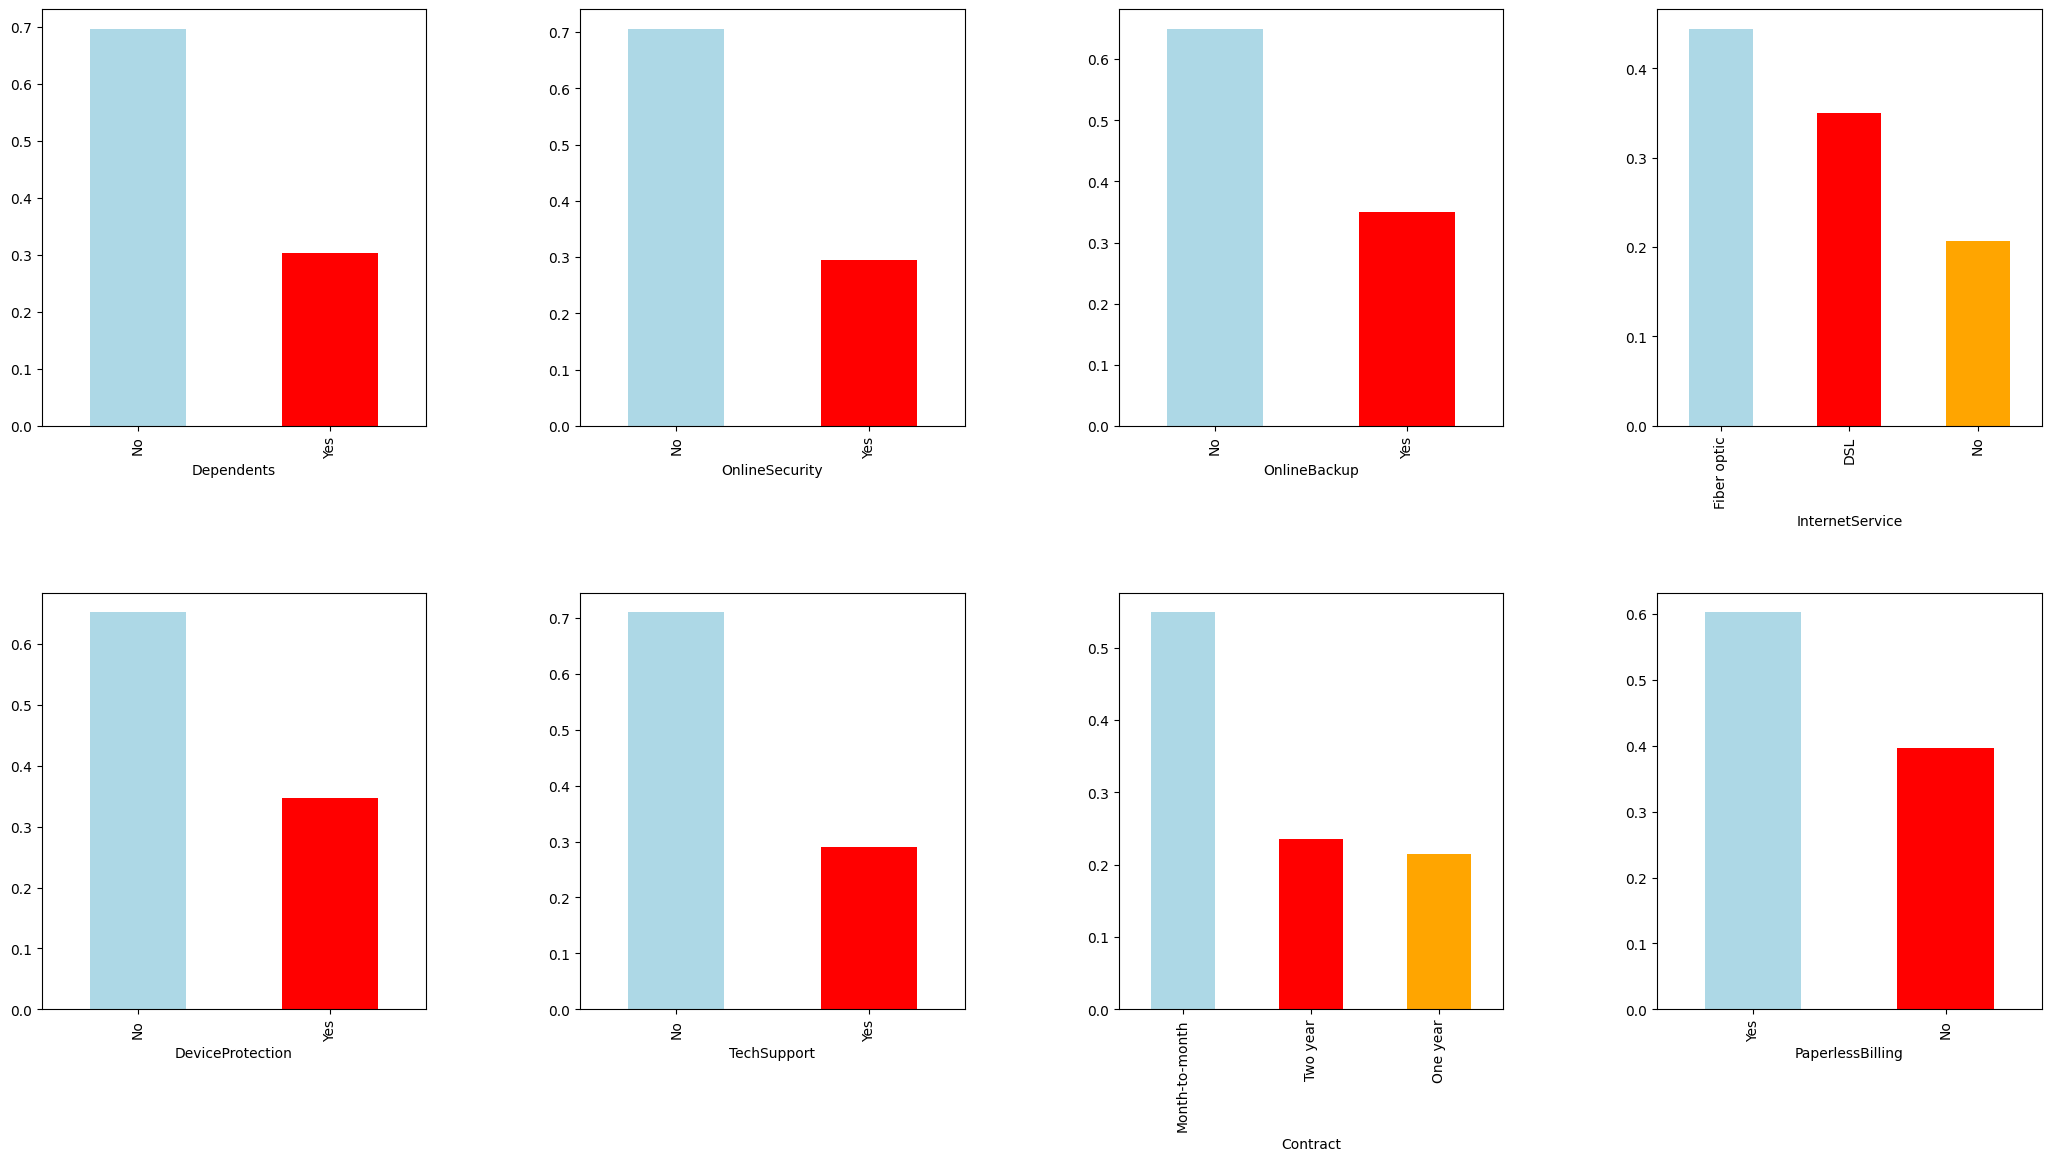

In [19]:
# Mendapatkan kolom bertipe object
df_cat = data.select_dtypes(include='object').columns
bar_color = ['lightblue', 'red', 'orange']
visual_categories =plt.figure(figsize=(10,10))

for i in range(8):
    visual_categories.add_subplot(2,4,i+1)
    data[df_cat[i]].value_counts(normalize=True).plot(kind='bar', color = bar_color)

plt.subplots_adjust(left=3,right=5,top=3,bottom=2,wspace = 0.4,hspace = 0.4)

Grafik di atas digunakan untuk memberikan gambaran menyeluruh mengenai perilaku pelanggan berdasarkan informasi akun dan penggunaan fasilitas layanan.

**Insight**:

Berikut adalah poin-poin utama yang dapat diambil dari visualisasi:
1. Sebagian besar pelanggan `tidak memiliki tanggungan`.
2. Sebagian besar pelanggan memilih paket `bulanan (subscription)`, dengan perbedaan yang signifikan dibandingkan dengan paket `Satu Tahun` atau `Dua Tahun`.
3. Mayoritas pelanggan menggunakan metode pembayaran `Paperless Billing` untuk tagihan mereka.
4. Pelanggan yang menggunakan layanan internet `Fiber Optic` mendominasi, meskipun tidak memiliki perbedaan signifikan dibandingkan dengan pelanggan `DSL`.
5. Sebagian besar pelanggan `tidak menggunakan layanan tambahan` seperti `Online Security`, `Online Backup`, `Device Protection`, dan `Tech Support`.

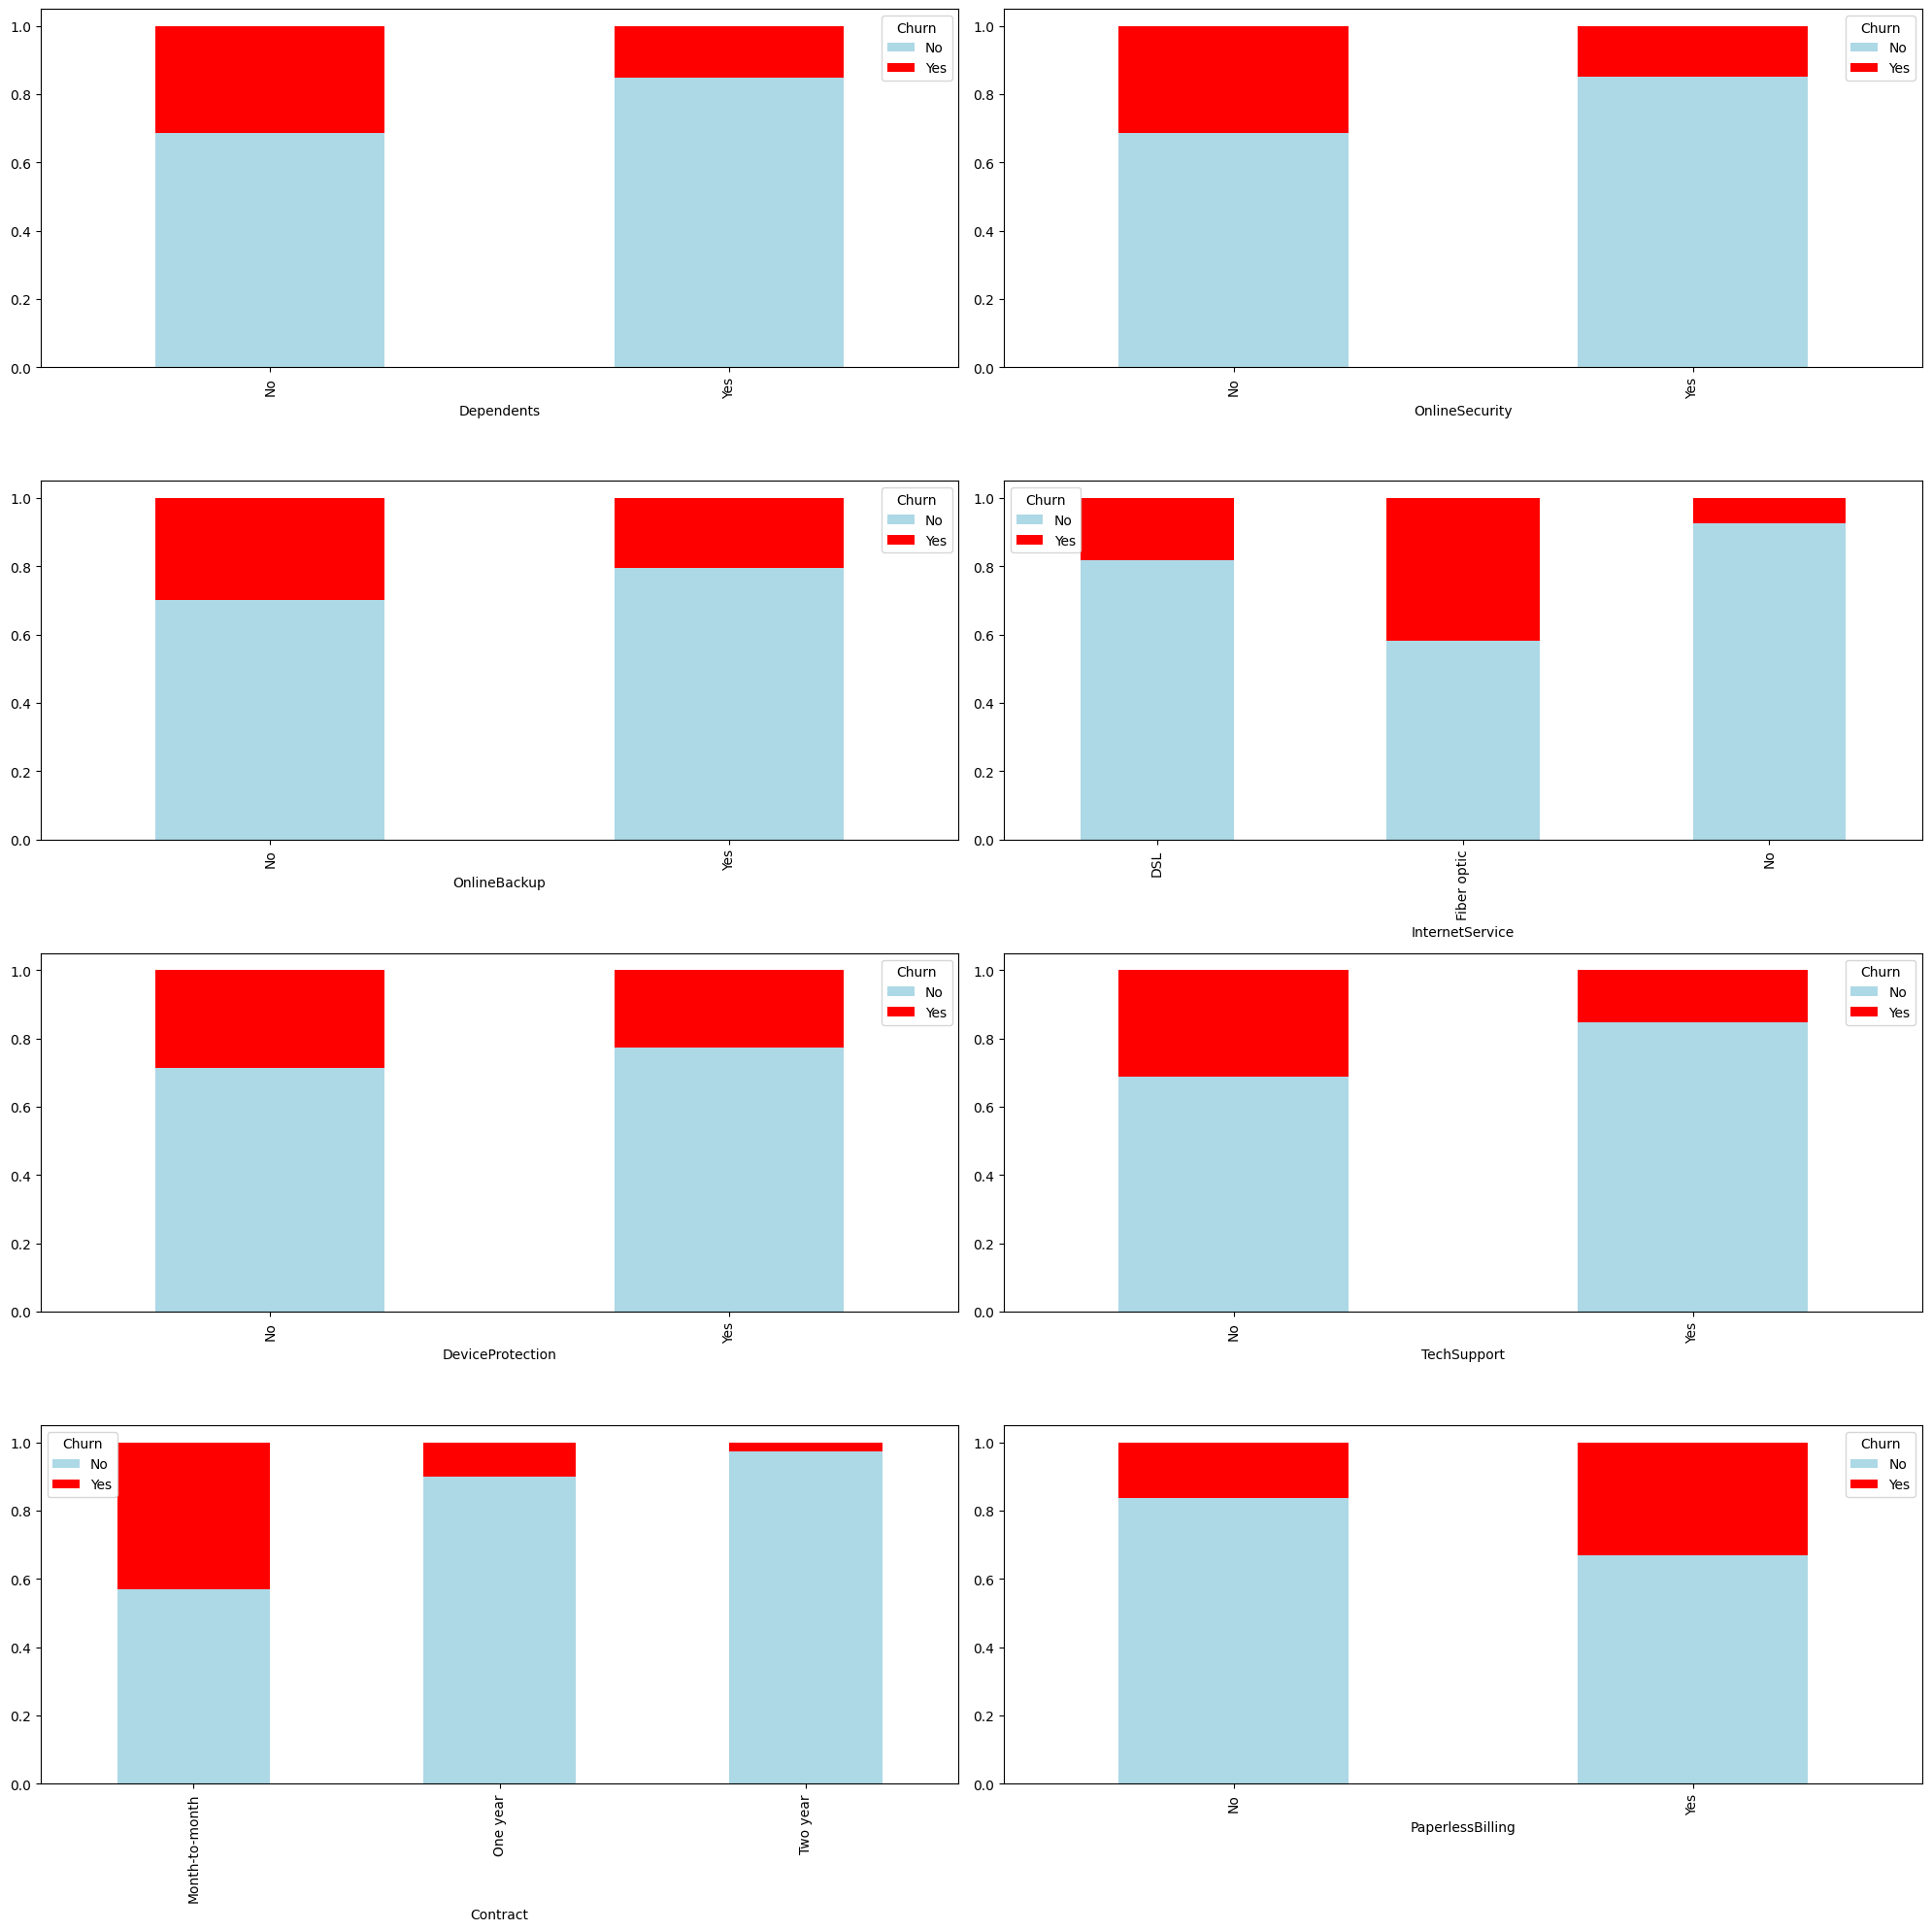

In [20]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in data.drop(columns=['Churn', 'tenure', 'MonthlyCharges']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(data[i],data['Churn'],normalize=0).plot(kind='bar',stacked=True,ax=ax, color = ['lightblue', 'red'])
    fig.tight_layout()

plt.show()

Grafik di atas bertujuan untuk memberikan gambaran perilaku pelanggan yang sudah dikelompokkan berdasarkan status `Churn` dan `Non-Churn`.

**Insight**:

Berikut adalah beberapa poin penting yang dapat diambil dari visualisasi tersebut:
1. Pelanggan yang `tidak memiliki tanggungan `(*dependents*) cenderung memiliki tingkat Churn yang lebih tinggi dibandingkan dengan pelanggan yang memiliki tanggungan.
2. Pelanggan yang menggunakan layanan internet `Fiber Optic` menunjukkan tingkat Churn yang lebih tinggi dibandingkan dengan pelanggan yang menggunakan **DSL** atau yang tidak menggunakan layanan internet sama sekali.
3. Pelanggan dengan kontrak `bulanan` (*month-to-month*) memiliki tingkat Churn yang jauh lebih tinggi dibandingkan dengan pelanggan yang memilih kontrak tahunan atau dua tahun.
4. Pelanggan yang menggunakan `Paperless` Billing lebih sering mengalami Churn dibandingkan dengan pelanggan yang masih menggunakan metode billing tradisional (non-Paperless Billing).
5. Pelanggan yang tidak memanfaatkan layanan tambahan seperti `Online Security`, `Online Backup`, `Device Protection`, dan `Tech Support` memiliki tingkat Churn yang lebih tinggi dibandingkan dengan pelanggan yang memanfaatkan layanan tersebut.


**Data Numerikal**

Pada bagian sebelumnya telah dijelaskan mengenai data kategorikal, selanjutnya akan dilakukan analisis terhadap data numerik, yaitu `Tenure` dan `MonthlyCharges`.


In [21]:
# Menghitung total tagihan semua pelanggan
total_billing = df['MonthlyCharges'].sum()
print(f"Total tagihan dari seluruh pelanggan: ${total_billing:.2f}")

# Menghitung total tagihan yang dihasilkan oleh pelanggan yang churn
churn_billing = df[df['Churn'] == 'Yes']['MonthlyCharges'].sum()
print(f"Total tagihan yang dihasilkan oleh pelanggan yang churn: ${churn_billing:.2f}")

# Menghitung proporsi tagihan pelanggan churn terhadap total tagihan
churn_proportion = (churn_billing / total_billing) * 100
print(f"Proporsi total tagihan dari pelanggan yang churn terhadap seluruh tagihan: {churn_proportion:.2f}%")


Total tagihan dari seluruh pelanggan: $319873.35
Total tagihan yang dihasilkan oleh pelanggan yang churn: $97986.25
Proporsi total tagihan dari pelanggan yang churn terhadap seluruh tagihan: 30.63%


Ditemukan bahwa dari total tagihan bulanan, sebanyak `30% atau setara dengan 96 ribu dolar` pendapatan perusahaan telah hilang akibat pelanggan yang memutuskan untuk berhenti menggunakan layanan.


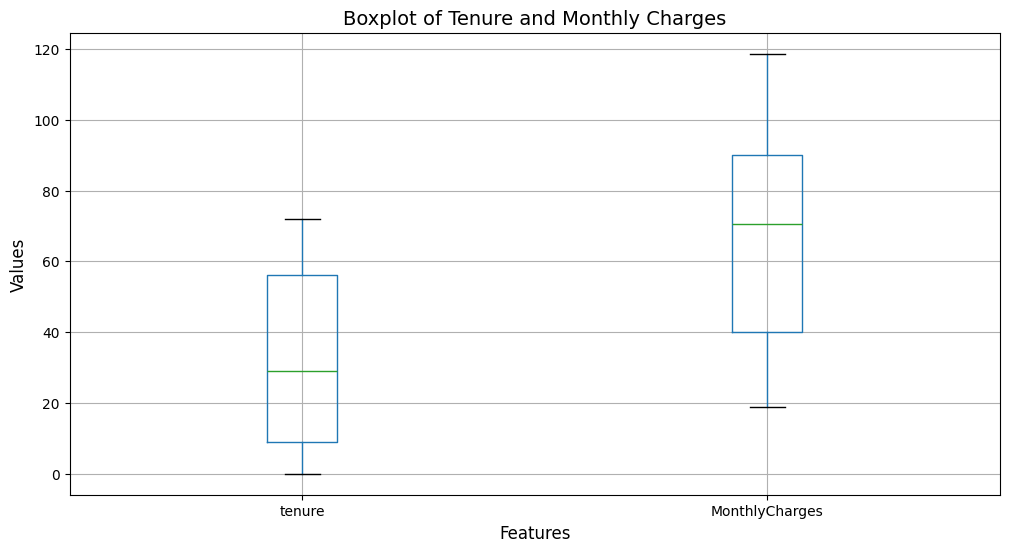

In [22]:
data[['tenure', 'MonthlyCharges']].boxplot(figsize=(12, 6))

plt.title('Boxplot of Tenure and Monthly Charges', fontsize=14)
plt.ylabel('Values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.show()

Berdasarkan boxplot di atas, terlihat bahwa distribusi data untuk kolom numerik `Tenure` dan `MonthlyCharges` memiliki karakteristik berikut:

1. `Distribusi Tidak Normal`:
   - Distribusi data pada kedua kolom menunjukkan adanya kemiringan (skewness), sehingga tidak mengikuti pola distribusi normal.

2. `Tidak Ada Outlier`:
   - Kedua variabel, baik `Tenure` maupun `MonthlyCharges`, tidak memiliki nilai outlier yang terdeteksi.


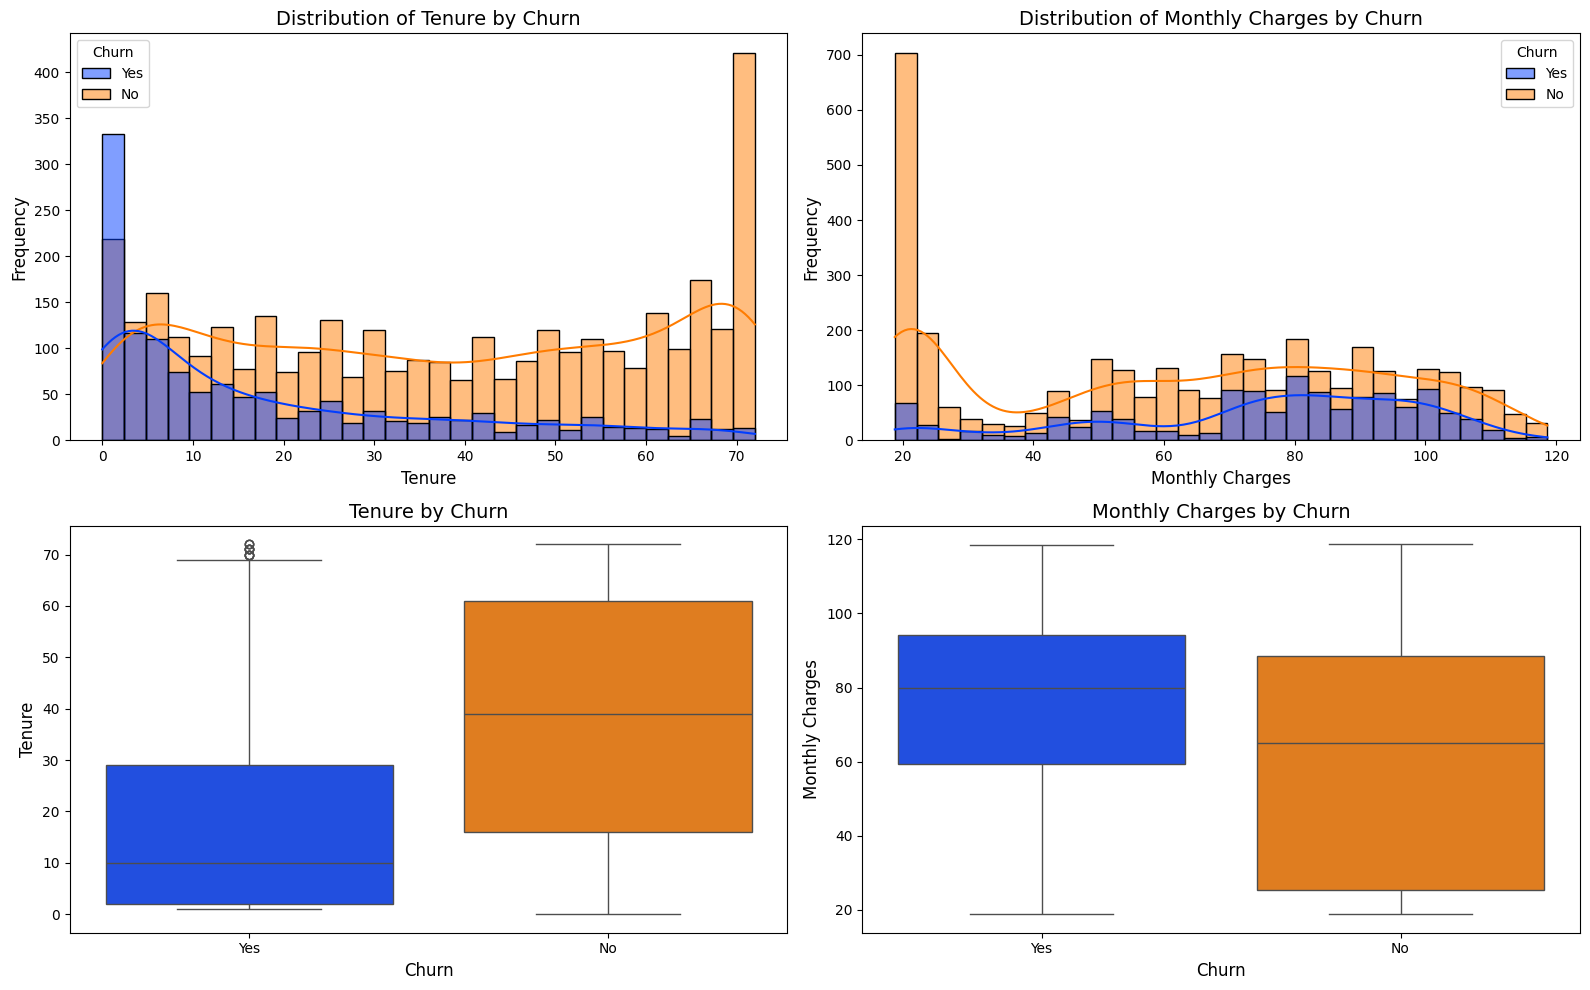

In [23]:
plt.figure(figsize=(16, 10))

# Histogram tenure dengan KDE berdasarkan Churn
plt.subplot(2, 2, 1)
sns.histplot(data=data, x='tenure', hue='Churn', kde=True, palette='bright', bins=30)
plt.title('Distribution of Tenure by Churn', fontsize=14)
plt.xlabel('Tenure', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Histogram Monthly Charges dengan KDE berdasarkan Churn
plt.subplot(2, 2, 2)
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', kde=True, palette='bright', bins=30)
plt.title('Distribution of Monthly Charges by Churn', fontsize=14)
plt.xlabel('Monthly Charges', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Boxplot tenure berdasarkan Churn
plt.subplot(2, 2, 3)
sns.boxplot(data=data, y='tenure', x='Churn', palette='bright')
plt.title('Tenure by Churn', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Tenure', fontsize=12)

# Boxplot Monthly Charges berdasarkan Churn
plt.subplot(2, 2, 4)
sns.boxplot(data=data, y='MonthlyCharges', x='Churn', palette='bright')
plt.title('Monthly Charges by Churn', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Monthly Charges', fontsize=12)

# Menampilkan plot
plt.tight_layout()  
plt.show()

Berdasarkan visualisasi di atas, berikut adalah beberapa poin penting yang dapat diambil:

1. **Hubungan antara Durasi Berlangganan (`Tenure`) dan Churn**:
   - Semakin lama durasi pelanggan berlangganan, semakin kecil kemungkinan pelanggan untuk Churn.
   - Pelanggan dengan durasi berlangganan yang pendek cenderung memiliki tingkat Churn yang lebih tinggi.

2. **Hubungan antara Tagihan Bulanan (`MonthlyCharges`) dan Churn**:
   - Pelanggan yang memiliki tagihan bulanan lebih tinggi cenderung memiliki tingkat Churn yang lebih besar dibandingkan pelanggan dengan tagihan bulanan yang lebih rendah.

3. **Outlier pada Data**:
   - Terdapat outlier pada kolom `Tenure` untuk pelanggan yang Churn (`Churn: Yes`).
   - Analisis lebih lanjut diperlukan untuk menentukan apakah outlier ini akan memengaruhi hasil analisis atau model.

In [24]:
# Filter data tenure untuk pelanggan yang Churn
tenure_yes_churn = data[data['Churn'] == 'Yes']['tenure']

# Menghitung kuartil dan IQR
Q1 = tenure_yes_churn.quantile(0.25)
Q3 = tenure_yes_churn.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
min_val = tenure_yes_churn.min()
max_val = tenure_yes_churn.max()

# Menampilkan hasil perhitungan
print(f"Interquartile Range (IQR): {IQR:.2f}")
print(f"Nilai Minimum: {min_val}")
print(f"Batas Minimum (Lower Bound): {lower_bound:.2f}")
print(f"Nilai Maksimum: {max_val}")
print(f"Batas Maksimum (Upper Bound): {upper_bound:.2f}\n")

# Menghitung jumlah data di atas batas maksimum
outliers_above = data[(data['Churn'] == 'Yes') & (data['tenure'] > upper_bound)].shape[0]
print(f"Terdapat {outliers_above} data dengan nilai `Tenure` yang melebihi batas maksimum.")


Interquartile Range (IQR): 27.00
Nilai Minimum: 1
Batas Minimum (Lower Bound): -38.50
Nilai Maksimum: 72
Batas Maksimum (Upper Bound): 69.50

Terdapat 13 data dengan nilai `Tenure` yang melebihi batas maksimum.


Berdasarkan hasil analisis di atas, data outlier yang ditemukan, yaitu sebanyak 13 data dengan nilai `Tenure` yang melebihi batas maksimum, dapat dianggap wajar. Hal ini disebabkan karena pelanggan-pelanggan tersebut telah menggunakan layanan perusahaan untuk jangka waktu yang lebih lama dibandingkan mayoritas pelanggan lainnya. Oleh karena itu, data outlier ini tidak menjadi masalah untuk digunakan dalam analisis lebih lanjut.


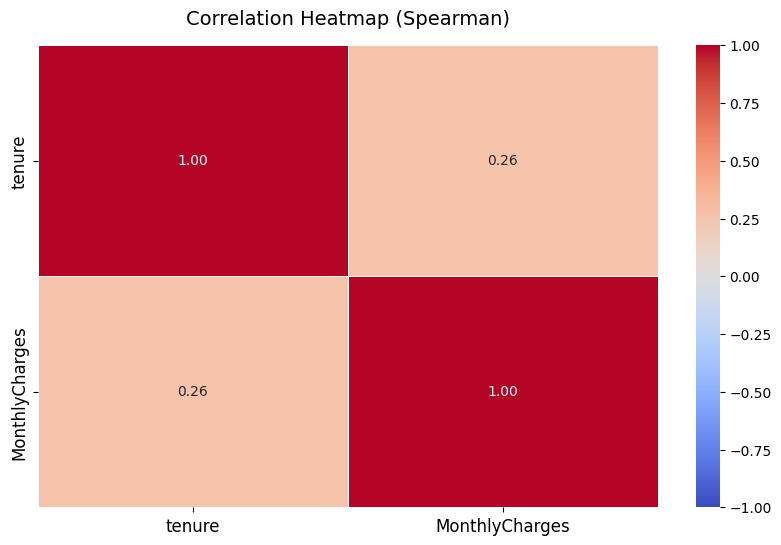

In [25]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(
    data[['tenure', 'MonthlyCharges']].corr(method='spearman'),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap='coolwarm',  
    fmt='.2f',        
    linewidths=0.5    
)

heatmap.set_title('Correlation Heatmap (Spearman)', fontdict={'fontsize':14}, pad=15)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12)

plt.show()

Berdasarkan heatmap korelasi di atas, dapat dilihat bahwa hubungan antara lamanya durasi berlangganan (`tenure`) dengan tagihan bulanan (`MonthlyCharges`) memiliki nilai korelasi yang rendah, yaitu 0.26. Hal ini menunjukkan bahwa lamanya pelanggan berlangganan tidak memiliki keterkaitan yang signifikan dengan besarnya tagihan bulanan.

Hal ini wajar karena tagihan bulanan tidak semata-mata bergantung pada durasi pelanggan menggunakan layanan, melainkan dihitung berdasarkan jenis dan jumlah fasilitas layanan yang digunakan oleh pelanggan.


## **Data Modelling & Evaluation Metrics**

**Data Preparation**

In [26]:
data.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No,No,No,No,No,Month-to-month,Yes,23.60,No


**Feature Selection**

In [27]:
# Feature Selection (Numeric)
data['Churn'] = data['Churn'].replace({'Yes': 1, 'No': 0})
data['Churn'] = data['Churn'].astype('int64')

Tujuan :
1. Mengubah nilai kategorikal kolom `Churn`:
   - `'Yes'` menjadi `1`
   - `'No'` menjadi `0`
2. Mengubah tipe data kolom `Churn` menjadi numerik (`int64`).

Agar data siap digunakan untuk *machine learning* atau analisis statistik serta mempermudah perhitungan dan visualisasi data.

In [28]:
# Feature Selection (Kategori)
from scipy.stats import chi2_contingency

chi_result = []
for column in data.select_dtypes(include=['object']) :
    cont_tabel = pd.crosstab(data[column], data['Churn'])
    chi2, pval, dof, expected = chi2_contingency(cont_tabel)
    pengaruh = pval < 0.05
    chi_result.append([column, chi2, pval, pengaruh])

chi_df = pd.DataFrame(
    chi_result,
    columns=['Feature, Chi-Square Statistics, P Value, Berpengaruh Terhadap Target(?)'.split(', ')]
)
chi_df

,Feature,Chi-Square Statistics,P Value,Berpengaruh Terhadap Target(?)
0,Dependents,138.497851,5.671674e-32,True
1,OnlineSecurity,141.866889,1.039889e-32,True
2,OnlineBackup,48.493354,3.314102e-12,True
3,InternetService,505.302778,1.883198e-110,True
4,DeviceProtection,19.383346,1.069355e-05,True
5,TechSupport,130.040881,4.014244e-30,True
6,Contract,851.729986,1.119911e-185,True
7,PaperlessBilling,166.458582,4.392323e-38,True


Berdasarkan hasil uji chi-square di atas, dapat disimpulkan bahwa semua kolom yang diuji memiliki pengaruh signifikan terhadap target (ditunjukkan dengan nilai P Value yang sangat kecil dan berada di bawah ambang signifikan). Oleh karena itu, semua fitur yang ditampilkan akan dimasukkan ke dalam proses pengujian lebih lanjut.


## **Define X (Features) and y (Target)**

In [29]:
X = data.drop(columns = ['Churn'])
X


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65
4,No,3,No,No,No,No,No,Month-to-month,Yes,23.60
...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10
4927,No,58,No,No,No,No,No,Two year,No,20.75
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75


In [30]:
y = data['Churn']
y

0       1
1       0
2       1
3       0
4       0
       ..
4925    0
4926    0
4927    0
4928    1
4929    0
Name: Churn, Length: 4853, dtype: int64

## **Data Splitting**

Membagi dataset menjadi data *train* dan data *test* dengan proporsi:
- **80% untuk data latih** (*train*).
- **20% untuk data uji** (*test*).

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2, 
    random_state = 20, 
    stratify=y
)

## **Preprocessing**

- **One-Hot Encoding**<br>
    digunakan untuk mengubah data kategorikal yang bersifat nominal menjadi representasi numerik. Teknik ini memastikan bahwa tidak ada nilai dalam data kategorikal yang dianggap memiliki urutan atau tingkat yang lebih tinggi dibandingkan nilai lainnya. Setiap kategori akan direpresentasikan dalam bentuk kolom biner (0 atau 1).

    Fitur-fitur yang akan diterapkan **One-Hot Encoding**:
    - `Dependents`
    - `PaperlessBilling`
    - `OnlineSecurity`
    - `OnlineBackup`
    - `InternetService`
    - `DeviceProtection`
    - `TechSupport`
    - `Contract`

- **StandardScaler**<br>
    digunakan untuk menormalisasi data numerik dengan mengubahnya sehingga memiliki rata-rata **0** dan standar deviasi **1**. Tujuan utamanya adalah menyamakan skala antar fitur numerik. Jika terdapat variabel numerik dengan rentang nilai yang jauh berbeda, variabel dengan rentang kecil cenderung memberikan kontribusi lebih rendah dalam proses pembelajaran model. Dengan teknik ini, kualitas dan kinerja model dapat ditingkatkan secara signifikan.

    Fitur-fitur yang akan diterapkan StandardScaler:
    - `tenure`
    - `MonthlyCharges`

In [32]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'Contract']),
    ('scaler', StandardScaler(), ['tenure', 'MonthlyCharges'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Dependents', 'OnlineSecurity',
                                  'OnlineBackup', 'InternetService',
                                  'DeviceProtection', 'TechSupport',
                                  'PaperlessBilling', 'Contract']),
                                ('scaler', StandardScaler(),
                                 ['tenure', 'MonthlyCharges'])])

In [33]:
df_test = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
df_test.head()

,onehot__Dependents_Yes,onehot__OnlineSecurity_Yes,onehot__OnlineBackup_Yes,onehot__InternetService_Fiber optic,onehot__InternetService_No,onehot__DeviceProtection_Yes,onehot__TechSupport_Yes,onehot__PaperlessBilling_Yes,onehot__Contract_One year,onehot__Contract_Two year,scaler__tenure,scaler__MonthlyCharges
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.304796,-0.310167
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.536162,-0.704435
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.371980,0.800495
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.140614,0.902837
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.213888,1.058867


# **Benchmarking**

Benchmarking adalah proses membandingkan performa beberapa model *machine learning* untuk menentukan model terbaik dalam menyelesaikan masalah klasifikasi.

**Model yang Dibandingkan**
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Decision Tree
- Random Forest
- XGBoost
- LightGBM
- Support Vector Classifier (SVC)

In [34]:
# Define Model Benchmarking

logreg = LogisticRegression()  
knn = KNeighborsClassifier()  
dt = DecisionTreeClassifier(random_state=20)
rf = RandomForestClassifier(random_state=20)
xgb = XGBClassifier(random_state=20, use_label_encoder=False, eval_metric='logloss')  
lgbm = LGBMClassifier(random_state=20)
svc = SVC(random_state=20)

## **Cross Validation**

In [35]:
# List Model
models = [logreg, knn, dt, rf, xgb, lgbm, svc]
score = []
rata = []
std = []

for i in models:
    skfold = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('preprocess',transformer),
        ('model',i)]
    )
    model_cv = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=skfold,
        scoring='recall'
    )
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

print('Hasil ')    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGB', 'LGBM', 'SVC'],'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False)


[LightGBM] [Info] Number of positive: 824, number of negative: 2281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 3105, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265378 -> initscore=-1.018199
[LightGBM] [Info] Start training from score -1.018199
[LightGBM] [Info] Number of positive: 824, number of negative: 2281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 3105, number of used features: 12
[LightGBM] [Info] [binary:Bo

,mean recall,sdev
model,,
Logistic Regression,0.531068,0.009513
LGBM,0.526214,0.034408
XGB,0.518447,0.042917
Random Forest,0.490291,0.036714
Decision Tree,0.489320,0.027869
KNN,0.482524,0.042386
SVC,0.462136,0.029029


- **Logistic Regression** memiliki performa terbaik dengan **mean recall tertinggi** (`0.531068`) dan **stabilitas tinggi** (sdev terkecil: `0.009513`).
- **LGBM** menjadi alternatif yang kompetitif dengan recall (`0.526214`) dan variabilitas rendah.
- **SVC** memiliki performa terendah dengan recall hanya sebesar `0.462136`.

## **Metode Balancing**

Untuk meningkatkan performa model, terutama dalam mendeteksi kelas minoritas, **metode balancing** akan diterapkan. Teknik ini bertujuan untuk menangani ketidakseimbangan data kelas, yang dapat mencakup:
- **Oversampling**: Menambah jumlah data pada kelas minoritas.
- **Undersampling**: Mengurangi jumlah data pada kelas mayoritas.
- **Menggunakan Algoritma dengan Penanganan Ketidakseimbangan**: Seperti memberikan bobot pada kelas minoritas dalam model.

Langkah ini diharapkan dapat meningkatkan performa recall pada model secara keseluruhan.

In [36]:
# Top 3 Model Berdasarkan Hasil Recall 

models = {
    'Logistic Regression' : LogisticRegression(solver = 'liblinear', random_state=7),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest' : RandomForestClassifier(n_estimators=200, random_state = 7)
}

Metode Balancing yang Digunakan : </br>
- SMOTE (Synthetic Minority Oversampling Technique)
- ADASYN (Adaptive Synthetic Sampling)
- RandomOverSampler
- RandomUnderSampler
- NearMiss
- CondensedNearestNeighbour

In [37]:

balancing_methods = {
    'SMOTE': SMOTE(random_state=201),
    'ADASYN': ADASYN(random_state=201),
    'RandomOverSampler': RandomOverSampler(random_state=201),
    'RandomUnderSampler': RandomUnderSampler(random_state=201),
    'NearMiss': NearMiss(version=3),
    'CondensedNearestNeighbour': CondensedNearestNeighbour(random_state=201)
    }

namaModel = []
namaBalance = []
recall = []

for model in models.items() :
    for i in balancing_methods.items() :
        pipemodel_ov = Pipeline([
        ('preprocessor', transformer),
        ('resample', i[1]),
        ('model', model[1])
        ])

        pipemodel_ov.fit(X_train, y_train)
        y_pred_ = pipemodel_ov.predict(X_test)

        namaModel.append(model[0])
        namaBalance.append(i[0])
        recall.append(round(recall_score(y_test, y_pred_), 2))

pd.DataFrame({
    'Method' : namaModel,
    'Metode Balancing' : namaBalance,
    'Recall' : recall,
}).sort_values(by='Recall', ascending=False).reset_index(drop=True)

,Method,Metode Balancing,Recall
0,Logistic Regression,ADASYN,0.82
1,Logistic Regression,SMOTE,0.79
2,Logistic Regression,RandomUnderSampler,0.79
3,Logistic Regression,RandomOverSampler,0.78
4,KNN,RandomUnderSampler,0.75
5,Logistic Regression,CondensedNearestNeighbour,0.74
6,Random Forest,RandomUnderSampler,0.74
7,KNN,ADASYN,0.73
8,KNN,RandomOverSampler,0.70
9,KNN,SMOTE,0.68


1. **Logistic Regression + ADASYN**:
   - Recall tertinggi (**0.82**) di antara semua kombinasi, menjadikannya metode terbaik untuk mendeteksi kelas minoritas.

2. **KNN + RandomUnderSampler**:
   - Memberikan performa terbaik untuk KNN dengan recall **0.75**, menunjukkan efektivitas dalam menangani ketidakseimbangan kelas.

3. **Random Forest + RandomUnderSampler**:
   - Recall terbaik untuk Random Forest sebesar **0.74**, menjadikannya metode balancing yang optimal untuk model ini.

## **Hyperparameter Tuning**

Hyperparameter Tuning adalah proses mencari kombinasi **parameter terbaik** untuk sebuah model *machine learning* agar performanya optimal pada dataset tertentu. </br>

Hyperparameter Tuning bertujuan untuk:</br>
1. **Meningkatkan performa model** dengan mengoptimalkan parameter.
2. **Mengurangi overfitting atau underfitting** agar model dapat generalisasi dengan baik.
3. **Menyesuaikan model dengan dataset** untuk hasil prediksi yang optimal.
4. **Maksimalkan efisiensi** tanpa mengganti algoritma yang digunakan.

### **1. Logistic Regression**

In [38]:
pipeline = Pipeline([
    ('preprocess', transformer),
    ('ADASYN', ADASYN(random_state=20)),
    ('model', logreg)
])

hyperparameters = {
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__C': [0.1, 1, 10, 100],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'model__max_iter': [100, 1000, 5000, 10000]
}

grid_logreg = GridSearchCV(pipeline, hyperparameters, cv=5, scoring='recall')

grid_logreg.fit(X_train, y_train)

best_params = grid_logreg.best_params_

In [54]:
print('Tabel berikut menunjukkan hasil dari grid search atau hyperparameter tuning untuk model Logistic Regression, di mana kombinasi terbaik dari parameter telah ditemukan.')
best_params_table = pd.DataFrame([grid_logreg.best_params_])
best_params_table

Tabel berikut menunjukkan hasil dari grid search atau hyperparameter tuning untuk model Logistic Regression, di mana kombinasi terbaik dari parameter telah ditemukan.


,model__C,model__max_iter,model__penalty,model__solver
0,1,100,l1,liblinear


### **2. KNN (K-Nearest Neighbors)**

In [40]:
pipeline = Pipeline([
    ('preprocess', transformer),
    ('randUnder', RandomUnderSampler(random_state=20)),
    ('model', KNeighborsClassifier())
])

hyperparameters = {
    'model__n_neighbors': [3, 5, 7, 9, 11],  # Rentang nilai K
    'model__weights': ['uniform', 'distance'],  # Metode pembobotan
    'model__metric': ['euclidean', 'manhattan']  # Metrik jarak
}

# Buat GridSearchCV object
grid_knn = GridSearchCV(pipeline, hyperparameters, cv=5, scoring='recall')

grid_knn.fit(X_train, y_train)

best_params = grid_knn.best_params_

In [53]:
print('Tabel berikut menunjukkan hasil dari grid search atau hyperparameter tuning untuk model KNN (K-Nearest Neighbors), di mana kombinasi terbaik dari parameter telah ditemukan.')
best_params_table = pd.DataFrame([grid_knn.best_params_])
best_params_table

Tabel berikut menunjukkan hasil dari grid search atau hyperparameter tuning untuk model KNN (K-Nearest Neighbors), di mana kombinasi terbaik dari parameter telah ditemukan.


,model__metric,model__n_neighbors,model__weights
0,euclidean,9,uniform


## **3. Random Forest**

In [42]:
pipeline = Pipeline([
    ('preprocess', transformer),
    ('randUnder', RandomUnderSampler(random_state=20)),
    ('model', RandomForestClassifier(random_state=42))
])

hyperparameters = {
    'model__n_estimators': [50, 100, 200],  # Jumleah trees dalam forest
    'model__max_depth': [None, 10, 20, 30],  # Kedalaman maksimum setiap pohon
    'model__min_samples_split': [2, 5, 10],  # Jumlah minimum sampel untuk membagi sebuah node
    'model__min_samples_leaf': [1, 2, 4],  # Jumlah minimum sampel untuk menjadi node daun
    'model__class_weight': [None, 'balanced']  # Menangani ketidakseimbangan kelas
}

grid_rf = GridSearchCV(pipeline, hyperparameters, cv=5, scoring='recall')

grid_rf.fit(X_train, y_train)

best_params = grid_rf.best_params_

In [51]:
print('Tabel berikut menunjukkan hasil dari grid search atau hyperparameter tuning untuk model Random Forest, di mana kombinasi terbaik dari parameter telah ditemukan.')
best_params_table = pd.DataFrame([grid_rf.best_params_])
best_params_table

Tabel berikut menunjukkan hasil dari grid search atau hyperparameter tuning untuk model Random Forest, di mana kombinasi terbaik dari parameter telah ditemukan.


,model__class_weight,model__max_depth,model__min_samples_leaf,model__min_samples_split,model__n_estimators
0,None,10,4,2,50


## **Test Data Setelah Hyperparameter Tuning**

**Kegunaan :**</br>

Bagian ini digunakan untuk mengevaluasi performa model pada **data *test*** setelah dilakukan **hyperparameter tuning**. Guna mengukur seberapa baik model yang telah dioptimalkan dapat melakukan prediksi pada data yang belum pernah dilihat sebelumnya.

**Tujuan :**
- Memvalidasi model untuk memastikan hasil tuning meningkatkan performa.
- Mendeteksi overfitting atau underfitting setelah tuning dilakukan.
- Membandingkan hasil model sebelum dan sesudah tuning untuk menentukan apakah model sudah optimal.

### **1. Test Data untuk Logistic Regression**

In [55]:
# Membuat instance Logistic Regression dengan parameter terbaik
logreg_tuned = LogisticRegression(
    C=1,               # Parameter regularisasi
    max_iter=100,      # Jumlah iterasi maksimum
    penalty='l1',      # Penalti L1 (Lasso Regularization)
    solver='liblinear' # Solver untuk optimasi
)

# Membangun pipeline
estimator_logreg = Pipeline([
    ('preprocess', transformer),            # Langkah preprocessing
    ('ADASYN', ADASYN(random_state=20)),    # Metode balancing ADASYN
    ('model', logreg_tuned)                 # Model Logistic Regression
])

# Melatih pipeline pada data latih
estimator_logreg.fit(X_train, y_train)

# Menghitung recall pada data latih
train_pred = estimator_logreg.predict(X_train)
train_recall = recall_score(y_train, train_pred)

# Menghitung recall pada data uji
test_pred = estimator_logreg.predict(X_test)
test_recall = recall_score(y_test, test_pred)

# Membuat DataFrame dengan hasilnya
df_results = pd.DataFrame({
    'model': ['Logistic Regression'],  # Nama model
    'Train Recall': [train_recall],    # Recall pada data latih
    'Test Recall': [test_recall],      # Recall pada data uji
}).set_index('model')

# Menampilkan hasil
pd.DataFrame(df_results)


,Train Recall,Test Recall
model,,
Logistic Regression,0.828155,0.825581


**Perbandingan Train Recall dan Test Recall**:
   - **Train Recall**: 0.828155 (82.82%)
   - **Test Recall**: 0.825581 (82.56%)
   - Perbedaan antara Train Recall dan Test Recall sangat kecil (0.26%), menunjukkan bahwa model memiliki generalisasi yang baik.

**Konsistensi Performa**:
   - Performa yang hampir sama pada data latih dan data uji mengindikasikan bahwa model tidak mengalami **overfitting** (terlalu fokus pada data latih) maupun **underfitting** (tidak belajar cukup dari data).

Logistic Regression dengan balancing **ADASYN** menunjukkan hasil yang konsisten antara data latih dan uji, sehingga model ini dapat diandalkan untuk mendeteksi kelas minoritas tanpa kehilangan kemampuan generalisasi.

### **2. Test Data untuk KNN (K-Nearest Neighbors)**

In [ ]:
# Membuat model KNN dengan parameter terbaik
knn_tuned = KNeighborsClassifier(
    n_neighbors=9,        # Jumlah tetangga terdekat
    metric='euclidean',   # Metode pengukuran jarak
    weights='uniform'     # Metode pembobotan
)

estimator_knn=Pipeline([
    ('preprocess', transformer),
    ('randUnder', RandomUnderSampler(random_state=20)),
    ('model', knn_tuned)
])

estimator_knn.fit(X_train, y_train)

train_pred = estimator_knn.predict(X_train)
train_recall = recall_score(y_train, train_pred)

test_pred = estimator_knn.predict(X_test)
test_recall = recall_score(y_test, test_pred)

df_results = pd.DataFrame({
    'model': ['KNN'],
    'Train Recall': [train_recall],
    'Test Recall': [test_recall],
}).set_index('model')

pd.DataFrame(df_results)

,Train Recall,Test Recall
model,,
KNN,0.840777,0.782946


**Perbandingan Train Recall dan Test Recall**:
   - **Train Recall**: 0.840777 (84.08%)
   - **Test Recall**: 0.782946 (78.29%)
   - Perbedaan antara Train Recall dan Test Recall adalah **5.78%**, menunjukkan adanya sedikit penurunan performa pada data uji.

**Konsistensi Performa**:
   - Model KNN menunjukkan performa yang cukup baik, tetapi perbedaan antara Train Recall dan Test Recall mengindikasikan bahwa model ini cenderung sedikit **overfitting** (lebih baik pada data latih dibanding data uji).

**KNN** dengan balancing **RandomUnderSampler** memiliki performa yang cukup baik dengan **Train Recall** sebesar 84.08% dan **Test Recall** sebesar 78.29%. Namun, terdapat penurunan performa pada data uji, sehingga model ini memerlukan evaluasi lebih lanjut untuk memastikan generalisasinya.

### **3. Test Data untuk Random Forest**

In [ ]:
# Membuat model RandomForestClassifier dengan parameter terbaik
rf_tuned = RandomForestClassifier(
    n_estimators=50,           # Jumlah pohon dalam hutan
    max_depth=10,              # Kedalaman maksimum pohon
    min_samples_leaf=4,        # Jumlah minimum sampel di setiap daun
    min_samples_split=2,       # Jumlah minimum sampel untuk membagi node internal
    class_weight=None,         # Tidak menggunakan penyesuaian bobot kelas
    random_state=42            # Menambahkan random state untuk konsistensi hasil
)

estimator_rf=Pipeline([
    ('preprocess', transformer),
    ('randUnder', RandomUnderSampler(random_state=20)),
    ('model', rf_tuned)
])

estimator_rf.fit(X_train, y_train)

train_pred = estimator_rf.predict(X_train)
train_recall = recall_score(y_train, train_pred)

test_pred = estimator_rf.predict(X_test)
test_recall = recall_score(y_test, test_pred)

df_results = pd.DataFrame({
    'model': ['Random Forest'],
    'Train Recall': [train_recall],
    'Test Recall': [test_recall],
}).set_index('model')

pd.DataFrame(df_results)


,Train Recall,Test Recall
model,,
Random Forest,0.881553,0.775194


**Perbandingan Train Recall dan Test Recall**:
   - **Train Recall**: 0.881553 (88.16%)
   - **Test Recall**: 0.775194 (77.52%)
   - Perbedaan antara Train Recall dan Test Recall adalah **10.64%**, menunjukkan adanya penurunan performa pada data uji.

**Konsistensi Performa**:
   - Model Random Forest memiliki performa yang sangat baik pada data latih (**88.16%**), tetapi ada indikasi **overfitting** karena performa pada data uji lebih rendah (**77.52%**).

**Random Forest** dengan balancing **RandomUnderSampler** menunjukkan performa yang tinggi pada data latih, tetapi kurang mampu mempertahankan performanya pada data uji. Model ini cocok jika fokus pada deteksi pada data latih, tetapi perlu dilakukan penyesuaian lebih lanjut untuk meningkatkan kemampuan generalisasinya.

## **Feature Importance**

**Tujuan Feature Importance**
1. Mengidentifikasi fitur yang paling berpengaruh terhadap prediksi model.
2. Memahami hubungan fitur dengan hasil prediksi.
3. Fokus pada fitur penting untuk pengembangan model atau keputusan bisnis.

In [47]:
# Mengambil model terbaik dari GridSearchCV
best_model = grid_logreg.best_estimator_

# Mendapatkan nama fitur dari transformer
feature_names = best_model.named_steps['preprocess'].get_feature_names_out()

# Mengambil koefisien dari model regresi logistik
coefs = best_model.named_steps['model'].coef_[0]

# Menghubungkan nama fitur dengan koefisiennya
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': coefs})

# Mengurutkan berdasarkan nilai absolut dari koefisien
feature_importances['abs_importance'] = feature_importances['importance'].abs()
feature_importances = feature_importances.sort_values(by='abs_importance', ascending=False)

# DataFrame 'feature_importances' sekarang tidak lagi memiliki kolom 'importance'
pd.DataFrame(feature_importances)

,feature,importance,abs_importance
9,onehot__Contract_Two year,-1.774655,1.774655
8,onehot__Contract_One year,-0.914758,0.914758
10,scaler__tenure,-0.563393,0.563393
11,scaler__MonthlyCharges,0.506199,0.506199
4,onehot__InternetService_No,-0.498386,0.498386
1,onehot__OnlineSecurity_Yes,-0.463941,0.463941
7,onehot__PaperlessBilling_Yes,0.429233,0.429233
6,onehot__TechSupport_Yes,-0.261318,0.261318
3,onehot__InternetService_Fiber optic,0.242571,0.242571
2,onehot__OnlineBackup_Yes,-0.238929,0.238929


- **Fitur Paling Penting**:
  - **onehot__Contract_Two year** (1.77) dan **onehot__Contract_One year** (0.91) menunjukkan jenis kontrak sangat menentukan churn.
  - **scaler__tenure** (0.56) dan **scaler__MonthlyCharges** (0.50) juga berpengaruh besar.

- **Fitur dengan Pengaruh Rendah**:
  - **onehot__DeviceProtection_Yes** (0.08) memiliki dampak kecil dan dapat dipertimbangkan untuk dihilangkan.
  
`Jenis kontrak` dan `lama pelanggan berlangganan` adalah faktor paling signifikan dalam memprediksi churn.

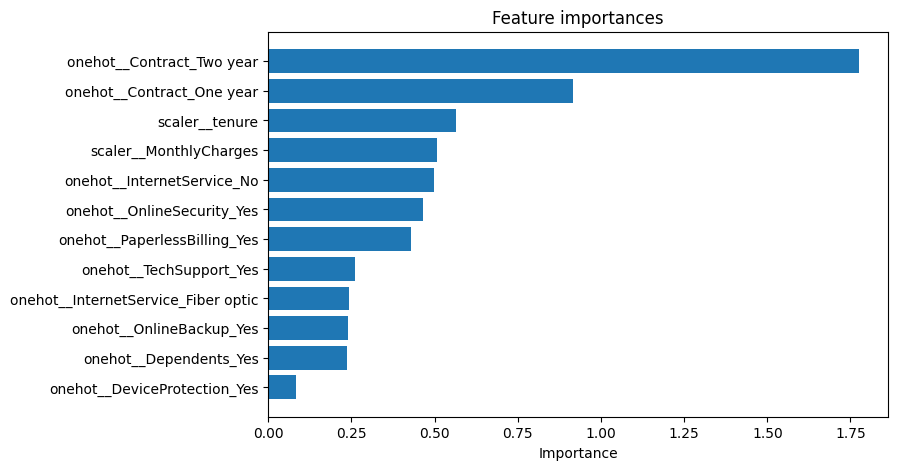

In [57]:
# Top 20 features
top_features = feature_importances[:20]

plt.figure(figsize=(8, 5))

plt.barh(top_features['feature'], top_features['abs_importance'], align='center')
plt.xlabel("Importance")
plt.title("Feature importances")
plt.gca().invert_yaxis()  
plt.show()

1. **Fitur Utama**:
   - **Contract_Two year** dan **Contract_One year** adalah fitur paling berpengaruh, menyoroti pentingnya jenis kontrak.
   - **Tenure** (lama berlangganan) dan **MonthlyCharges** (biaya bulanan) juga signifikan dalam memprediksi churn.

2. **Fitur Sedang**:
   - **OnlineSecurity**, **PaperlessBilling**, dan **TechSupport** memiliki pengaruh moderat.

3. **Fitur Rendah**:
   - **DeviceProtection_Yes** memiliki pengaruh paling kecil.

`Jenis kontrak`, `lama berlangganan`, dan `biaya bulanan` adalah faktor utama yang menentukan churn pelanggan.

## **Kesimpulan**

**Domain Teknis**

Dalam proses analisis ini, nilai **No Service** pada beberapa kolom diubah karena dianggap setara dengan `No`. Selain itu, dilakukan pembersihan data dengan menghapus duplikasi dan memastikan dataset bebas dari nilai kosong atau missing value.

Transformasi fitur dilakukan dengan menetapkan kolom **Churn** sebagai target. Semua kolom kecuali **Tenure** dan **MonthlyCharges** dilakukan encoding menggunakan **OneHotEncoder** untuk mengubah fitur kategorikal menjadi numerik. Kolom numerik seperti **Tenure** dan **MonthlyCharges** kemudian di-*scale* menggunakan **StandardScaler** untuk memastikan distribusi yang konsisten di seluruh fitur.

Pada tahap evaluasi model menggunakan **cross-validation**, hasil awal menunjukkan bahwa **Logistic Regression** memiliki nilai mean recall terbaik sebesar **0.5311** dengan standar deviasi **0.0095**, diikuti oleh **LGBM** dengan recall **0.5262** dan standar deviasi **0.0344**. Model **XGBoost** berada di posisi ketiga dengan nilai recall **0.5184**. Model **SVC** memiliki performa recall terendah dengan nilai **0.4621**, menandakan bahwa model ini kurang optimal pada dataset ini.

Proses hyperparameter tuning dilakukan untuk meningkatkan performa Logistic Regression. Parameter seperti **C=1** untuk regularisasi, **max_iter=100** untuk iterasi maksimum, dan **penalty=L1** untuk regularisasi Lasso diterapkan. Hasil tuning menunjukkan peningkatan performa recall Logistic Regression dari **0.8217 (default)** menjadi **0.8255 (tuned)** pada data uji, menandakan adanya peningkatan setelah optimasi.

Pipeline untuk Logistic Regression dibangun dengan langkah preprocessing menggunakan **StandardScaler**, balancing data menggunakan **ADASYN**, dan model Logistic Regression yang sudah dituning. Evaluasi model dilakukan pada data latih dan data uji untuk mengukur performa recall. Hasilnya menunjukkan nilai **Train Recall** sebesar **0.828155 (82.82%)** dan **Test Recall** sebesar **0.825581 (82.56%)**, dengan perbedaan yang sangat kecil (0.26%). Hal ini membuktikan bahwa tuning parameter berhasil meningkatkan performa tanpa menyebabkan overfitting atau underfitting.

Dari analisis feature importance, kolom **Contract** menjadi fitur yang paling signifikan dalam memprediksi churn, terutama untuk nilai kontrak **One Year** dan **Two Year**. Selain itu, fitur seperti **Tenure** dan **MonthlyCharges** juga memberikan kontribusi besar terhadap prediksi churn.

Secara keseluruhan, penggunaan **StandardScaler** terbukti membantu menormalkan kolom numerik untuk memastikan performa model yang optimal. **Logistic Regression** memberikan performa terbaik berdasarkan evaluasi *cross-validation*, hasil tuning, dan hasil pengujian akhir, menjadikannya model yang paling efektif dalam memprediksi churn pelanggan.


In [ ]:
from sklearn.metrics import recall_score

estimator_logreg_default = Pipeline([
    ('preprocess', transformer),
    ('ADASYN', ADASYN(random_state=20)),
    ('model', logreg)
])

estimator_logreg_default.fit(X_train, y_train)

logreg_tuned = LogisticRegression(
    C=1,               # Parameter regularisasi
    max_iter=100,      # Jumlah iterasi maksimum
    penalty='l1',      # Penalti L1 (Ridge Regularization)
    solver='liblinear' # Solver untuk optimasi
)

estimator_logreg_tuned=Pipeline([
    ('preprocess', transformer),
    ('ADASYN', ADASYN(random_state=20)),
    ('model', logreg_tuned)
])

estimator_logreg_tuned.fit(X_train, y_train)

y_pred_default = estimator_logreg_default.predict(X_test)
y_pred_tuned = estimator_logreg_tuned.predict(X_test)

recall_score_default = recall_score(y_test, y_pred_default)
recall_score_tuned = recall_score(y_test, y_pred_tuned)

print('Recall Score Default Logistic Regression : ', recall_score_default)
print('Recall Score Tuned Logistic Regression : ', recall_score_tuned)

Recall Score Default Logistic Regression :  0.8217054263565892
Recall Score Tuned Logistic Regression :  0.8255813953488372


In [50]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default Logistic Regression : \n', report_default)
print('Classification Report Tuned Logistic Regression : \n', report_tuned)

Classification Report Default Logistic Regression : 
               precision    recall  f1-score   support

           0       0.91      0.69      0.78       713
           1       0.49      0.82      0.61       258

    accuracy                           0.72       971
   macro avg       0.70      0.75      0.70       971
weighted avg       0.80      0.72      0.74       971

Classification Report Tuned Logistic Regression : 
               precision    recall  f1-score   support

           0       0.92      0.69      0.79       713
           1       0.49      0.83      0.61       258

    accuracy                           0.72       971
   macro avg       0.70      0.76      0.70       971
weighted avg       0.80      0.72      0.74       971



Dari hasil di atas, dapat dibuktikan bahwa Logistic Regression yang telah dilakukan tuning memberikan hasil yang lebih baik dibandingkan Logistic Regression default. Perbedaan paling mencolok terlihat pada **recall score** untuk kelas 1 (kelas minoritas), yang meningkat dari **0.82** pada model default menjadi **0.83** setelah tuning. Meskipun peningkatan ini kecil, hal ini menunjukkan bahwa tuning parameter yang diterapkan berhasil meningkatkan kemampuan model dalam mendeteksi kelas minoritas.

Berdasarkan **classification report**, model default memiliki **accuracy** sebesar **72%**, dengan **macro average recall** sebesar **0.75**. Setelah tuning, meskipun accuracy tetap di angka **72%**, **macro average recall** meningkat menjadi **0.76**, yang menunjukkan peningkatan performa model pada kedua kelas (kelas 0 dan kelas 1). Selain itu, precision dan f1-score untuk kelas minoritas juga mengalami sedikit perbaikan.

Dengan demikian, tuning yang diterapkan pada Logistic Regression menghasilkan model dengan parameter terbaik yang dapat digunakan untuk memprediksi churn pelanggan secara lebih efektif, khususnya dalam mendeteksi pelanggan dari kelas minoritas.

**Domain Bisnis**

Dari perspektif bisnis, analisis menunjukkan bahwa jenis kontrak secara signifikan memengaruhi perilaku pelanggan di sektor telekomunikasi. Berdasarkan analisis **feature importance**, pelanggan dengan kontrak **dua tahun (Two Year)** dan **satu tahun (One Year)** memiliki kontribusi yang signifikan terhadap prediksi churn. Sebaliknya, pelanggan dengan kontrak **bulanan (month-to-month)** cenderung lebih rentan terhadap churn, tetapi dapat memberikan dampak positif yang lebih besar terhadap hasil bisnis jika strategi retensi yang efektif diterapkan.

Selain itu, durasi pelanggan berlangganan, yang direpresentasikan oleh fitur **Tenure**, memiliki dampak besar pada perilaku churn. Menariknya, semakin lama seorang pelanggan bertahan, hasil bisnis tampaknya semakin terpengaruh secara negatif, yang menunjukkan potensi kebosanan atau kurangnya inovasi dalam layanan. Hal ini menekankan pentingnya tidak hanya mempertahankan pelanggan, tetapi juga memastikan tingkat keterlibatan dan kepuasan mereka tetap tinggi sepanjang perjalanan mereka bersama perusahaan.

Jenis layanan internet yang digunakan pelanggan juga memainkan peran penting. Berdasarkan analisis, pelanggan yang menggunakan layanan **Fiber Optic** memberikan dampak positif yang lebih besar terhadap hasil bisnis dibandingkan dengan pelanggan **DSL**, yang cenderung memberikan kontribusi lebih rendah. Hal ini mengindikasikan bahwa Fiber Optic memberikan tingkat kepuasan atau nilai yang lebih tinggi kepada pelanggan.

Dampak dari **biaya bulanan (Monthly Charges)** juga menjadi observasi penting. Pelanggan dengan biaya bulanan yang lebih tinggi cenderung memiliki risiko churn lebih tinggi, namun mereka juga memberikan dampak positif terhadap hasil bisnis. Oleh karena itu, strategi penetapan harga perlu dieksplorasi lebih lanjut untuk memastikan bahwa nilai yang ditawarkan sesuai dengan biaya yang dikenakan kepada pelanggan.

Analisis lebih lanjut mengungkapkan bahwa penggunaan dukungan teknis (**Tech Support**) memainkan peran signifikan. Menariknya, pelanggan yang tidak memanfaatkan dukungan teknis cenderung memberikan kontribusi lebih positif dibandingkan dengan mereka yang menggunakan layanan tersebut. Hal ini menunjukkan perlunya mengevaluasi peran dan efektivitas dukungan teknis, yang mungkin mengindikasikan bahwa pelanggan yang membutuhkan bantuan teknis sering mengalami lebih banyak masalah atau merasa kurang puas dengan layanan yang ada.

Terakhir, faktor-faktor seperti **Online Security**, keberadaan **Dependents**, dan penggunaan **Online Backup** juga memengaruhi hasil bisnis dalam berbagai tingkat. Berdasarkan hasil analisis, fitur-fitur ini memberikan kontribusi penting dalam memahami perilaku pelanggan. Sebagai contoh, pelanggan dengan **Dependents** cenderung memiliki tingkat retensi lebih baik, mungkin karena kebutuhan mereka terhadap layanan yang stabil.

## **Rekomendasi**

Berdasarkan analisis, perusahaan disarankan untuk **memprioritaskan promosi kontrak jangka panjang** seperti kontrak satu tahun dan dua tahun. **Upaya pemasaran** dapat ditingkatkan dengan menawarkan **insentif berupa diskon atau manfaat tambahan** kepada pelanggan yang beralih dari kontrak bulanan. Hal ini bertujuan untuk meningkatkan **retensi pelanggan**.

Selain itu, **pelanggan dengan durasi langganan yang lebih lama** menunjukkan potensi churn yang lebih tinggi. Oleh karena itu, perusahaan perlu meningkatkan **keterlibatan pelanggan lama** melalui **program loyalitas** atau **penawaran eksklusif**. Menyediakan **inovasi layanan** untuk pelanggan lama juga dapat meningkatkan **kepuasan mereka**.

**Layanan internet** yang ditawarkan juga memegang peran penting. Pelanggan dengan layanan **Fiber Optic** menunjukkan **kepuasan lebih tinggi** dibandingkan dengan pelanggan **DSL**. Oleh karena itu, perusahaan disarankan untuk **memperluas jangkauan Fiber Optic** dan meningkatkan **kualitas layanannya**.

Selanjutnya, **biaya bulanan** juga memengaruhi risiko churn. Pelanggan dengan **biaya bulanan tinggi** cenderung lebih rentan terhadap churn. Untuk mengatasi hal ini, perusahaan dapat **mengevaluasi strategi harga** dengan memastikan nilai yang diberikan sesuai dengan biaya yang dibayarkan pelanggan. Misalnya, perusahaan dapat menawarkan **paket harga yang lebih fleksibel** atau menambahkan **manfaat tambahan** untuk pelanggan dengan biaya lebih tinggi.

Dalam hal **dukungan teknis**, pelanggan yang menggunakan layanan ini cenderung merasa **kurang puas**. Perusahaan perlu **mengevaluasi dan meningkatkan efektivitas dukungan teknis**, baik dari segi **kualitas** maupun **kecepatan** dalam menyelesaikan masalah pelanggan. Hal ini akan membantu meningkatkan **pengalaman pelanggan** dan mengurangi potensi churn.

Selain itu, layanan tambahan seperti **Online Security**, **Online Backup**, dan **Device Protection** dapat diperkuat untuk memberikan **nilai tambah** yang lebih jelas kepada pelanggan. Menawarkan layanan ini dengan cara yang lebih menarik dan mudah diakses dapat membantu meningkatkan **retensi pelanggan**.

Terakhir, **pelanggan dengan tanggungan (Dependents)** menunjukkan tingkat retensi lebih tinggi. Oleh karena itu, perusahaan dapat **menyasar kelompok pelanggan ini** dengan **penawaran khusus**, seperti **paket keluarga**, untuk memperkuat hubungan dengan pelanggan dan menciptakan pengalaman yang lebih personal.

Dengan menerapkan langkah-langkah ini, perusahaan dapat **meningkatkan retensi pelanggan** dan **mengoptimalkan hasil bisnis** secara keseluruhan.
